In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
# from rdkit import Chem
import os

from torch_geometric.loader import DataLoader
import torch
from utils_data import TestbedDataset

In [2]:
path = 'root_folder/root_020/Saliency/GNNExplainer/'

# Decode Drug
Now we decode drugs with GNNExplainer in place of IG

### Decode feature matrix

for one drug, if we decode along the feature matrix, there will be an attibution matrix of size (num_atom x num_feature)
- how to decide the baseline??
- to decide the saliency of one atom, add the saliency scores obtained by all features (does this make sense?)


In [2]:
drug_path = 'root_folder/root_002/Saliency/Drug/GCNNet/9.npy'
drug_saliency = np.load(drug_path)
drug_saliency.shape

(74, 192)

In [4]:
drug_sal = np.sum(drug_saliency, axis=1)
drug_sal.shape

(74,)

In [5]:
drug_sal

array([5.72698098e+01, 5.87640966e+01, 3.81660902e+01, 2.02629281e+01,
       1.39559163e+01, 5.15650478e+00, 2.25081590e-01, 8.03731059e-02,
       4.01393576e-02, 3.24094412e-02, 4.01393576e-02, 8.03731059e-02,
       1.72573140e+00, 1.91731012e+00, 7.53781092e-01, 2.93331933e-01,
       1.73615518e-01, 2.50964194e-01, 6.23479498e-01, 8.35384420e-01,
       8.11343899e-01, 5.70150065e-01, 2.24776253e-01, 7.24573484e-02,
       1.42680280e-02, 7.39319520e-03, 2.08159661e-03, 0.00000000e+00,
       0.00000000e+00, 1.62699300e-03, 6.83667214e-02, 1.49844595e-02,
       7.66769313e-03, 2.78686154e-03, 0.00000000e+00, 0.00000000e+00,
       2.88309285e-03, 7.92492614e-03, 1.57183519e-02, 4.71933697e-02,
       1.50110580e-02, 7.91694604e-03, 2.15553543e-03, 0.00000000e+00,
       0.00000000e+00, 2.52142377e-03, 4.48203763e-02, 1.49795172e-01,
       3.88421885e-01, 5.84764716e-01, 5.61570580e-01, 5.29350311e-01,
       2.09256552e-01, 1.67784892e-01, 3.39197025e-01, 8.66563574e-01,
      

In [6]:
norm = np.linalg.norm(drug_sal)
drug_sal1 = drug_sal / norm
drug_sal1

array([4.27606805e-01, 4.38763944e-01, 2.84968292e-01, 1.51293779e-01,
       1.04202280e-01, 3.85012023e-02, 1.68057865e-03, 6.00108280e-04,
       2.99701754e-04, 2.41986095e-04, 2.99701754e-04, 6.00108280e-04,
       1.28852268e-02, 1.43156552e-02, 5.62812982e-03, 2.19017195e-03,
       1.29630563e-03, 1.87383191e-03, 4.65522894e-03, 6.23742359e-03,
       6.05792430e-03, 4.25704308e-03, 1.67829884e-03, 5.41005031e-04,
       1.06532672e-04, 5.52015205e-05, 1.55423054e-05, 0.00000000e+00,
       0.00000000e+00, 1.21479935e-05, 5.10462239e-04, 1.11881930e-04,
       5.72510678e-05, 2.08081878e-05, 0.00000000e+00, 0.00000000e+00,
       2.15267019e-05, 5.91717060e-05, 1.17361560e-04, 3.52370754e-04,
       1.12080528e-04, 5.91121223e-05, 1.60943719e-05, 0.00000000e+00,
       0.00000000e+00, 1.88262885e-05, 3.34652725e-04, 1.11845029e-03,
       2.90016401e-03, 4.36616383e-03, 4.19298409e-03, 3.95241046e-03,
       1.56242051e-03, 1.25277108e-03, 2.53262507e-03, 6.47022371e-03,
      

In [14]:
drug_sal2 = np.round(drug_sal1, 2)
drug_sal2

array([0.43, 0.44, 0.28, 0.15, 0.1 , 0.04, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.01, 0.02, 0.02, 0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.08,
       0.21, 0.11, 0.32, 0.31, 0.25, 0.16, 0.34, 0.22])

In [13]:
drug_rank = drug_sal1.argsort()
drug_rank = drug_rank + 1
drug_rank

array([45, 44, 36, 35, 29, 28, 30, 27, 43, 46, 34, 37, 26, 33, 42, 38, 63,
       62, 64, 25, 32, 41, 39, 10, 61, 65,  9, 11, 47, 40, 31, 24,  8, 12,
       48, 54, 17, 53, 60, 23,  7, 18, 16, 55, 49, 52, 51, 22, 50, 19, 15,
       21, 20, 56, 13, 14, 57, 58, 59,  6, 66,  5, 68,  4, 72, 67, 74, 71,
        3, 70, 69, 73,  1,  2])

In [8]:
data_folder = "data/"
df2 = pd.read_csv(data_folder+'drugs_smile.csv', sep='\t')
df2

drug_id                                             SMILES
0       1559  CCNC(=O)C1=C(C(=C2C=C(C(=CC2=O)O)C(C)C)ON1)C3=...
1       1058  CS(=O)(=O)N1CCN(CC1)CC2=CC3=C(S2)C(=NC(=N3)C4=...
2       1088  CCC1=C2CN3C(=CC4=C(C3=O)COC(=O)C4(CC)O)C2=NC5=...
3       1549  CNC(=O)CN1CCC(CC1)OC2=C(C=C3C(=C2)C(=NC=N3)NC4...
4       1073                               C1=C(C(=O)NC(=O)N1)F
..       ...                                                ...
164     1629  CC1=CN=C(N=C1NCC2=CC=C(C=C2)N3C=CN=N3)C4=CC=CC...
165     1799  C=CC(=O)N1CCCC(C1)N2C3=NC=NC(=C3C(=N2)C4=CC=C(...
166     1835  CC(=CC(=O)OC1CC2=CC(CC3(C(O3)C4C1C(=C)C(=O)O4)...
167     1908  CC(C)NC1=NC=C(C(=C1)C2=CNC(=C2)C(=O)NC(CO)C3=C...
168     1915  CC1CN(CCN1C(=O)OC2=C(C=C3C(=C2)C(=NC=N3)NC4=C(...

[169 rows x 2 columns]

### Decode edges

In [41]:
drug_path = 'root_folder/root_010/Saliency/Bonds/GCN/0_ZM447439_910944.npy'
drug_saliency = np.load(drug_path)
drug_saliency.shape

FileNotFoundError: [Errno 2] No such file or directory: 'root_folder/root_010/Saliency/Bonds/GCN/0_ZM447439_910944.npy'

In [3]:
drug_saliency

array([2.48651867e-01, 1.00000000e+00, 8.62972502e-02, 5.13686340e-01,
       9.26098535e-02, 1.61039935e-02, 1.87078602e-02, 1.11422732e-01,
       1.71499217e-02, 1.38293178e-01, 4.56860660e-01, 6.57679778e-02,
       6.00790490e-02, 8.38509164e-01, 2.03361122e-01, 4.48156186e-02,
       1.24145066e-01, 4.47597770e-01, 1.10815505e-01, 1.83448087e-02,
       4.86267177e-01, 4.81749400e-01, 9.96485772e-02, 3.49921795e-01,
       3.44002690e-01, 4.32759571e-01, 6.30067611e-01, 4.81628118e-02,
       5.64444547e-01, 2.32782007e-02, 2.57945530e-01, 9.97448768e-02,
       1.34424267e-01, 1.43029179e-01, 1.76312617e-02, 1.02447350e-02,
       1.47948987e-02, 4.18935038e-02, 1.53463558e-01, 6.69968962e-02,
       1.47949020e-02, 3.61981299e-03, 4.82611034e-02, 1.43029179e-01,
       6.21532028e-02, 2.41255107e-01, 2.85844751e-01, 2.56820242e-01,
       1.62973716e-01, 4.84187081e-02, 6.38807359e-01, 4.55403981e-02,
       5.50824712e-02, 4.75124767e-03, 6.67292270e-02, 1.19101767e-02,
      

In [7]:
agg_ss = np.zeros(int(drug_saliency.shape[0]/2))
agg_ss.shape

(42,)

In [9]:
for i in range(agg_ss.shape[0]):
    agg_ss[i] = drug_saliency[2*i] + drug_saliency[2*i+1]

agg_ss

array([1.24865187, 0.59998359, 0.10871385, 0.13013059, 0.1554431 ,
       0.52262864, 0.89858821, 0.24817674, 0.57174284, 0.12916031,
       0.96801658, 0.44957037, 0.77676226, 0.67823042, 0.58772275,
       0.35769041, 0.27745345, 0.027876  , 0.0566884 , 0.22046045,
       0.01841471, 0.19129028, 0.30340831, 0.54266499, 0.21139242,
       0.68434776, 0.05983372, 0.0786394 , 0.10040233, 0.09723016,
       0.06618496, 0.07635564, 0.09788725, 0.52297044, 0.37440925,
       0.27800776, 0.35725234, 0.05877977, 0.18508299, 0.17541439,
       0.18154214, 0.08714127])

# Decode cell line features
## One instance

In [5]:
cell_path = 'root_folder/root_020/Saliency/IG/CellLine/GAT_Edge/0_KIN001-266_910706.npy'
cell_saliency = np.load(cell_path)
cell_saliency = cell_saliency.reshape(-1)
cell_saliency

array([2.48441673e-06, 6.33429891e-05, 3.40226226e-04, 4.82947790e-03,
       1.73507006e-02, 9.36279956e-04, 7.32137690e-03, 1.16107586e-02,
       2.61995258e-02, 8.20469864e-05, 2.57963959e-03, 1.49186819e-02,
       9.62274239e-02, 1.60096273e-03, 2.60472714e-03, 8.97722723e-03,
       7.42706424e-03, 1.60535932e-02, 1.23202738e-02, 3.66077526e-03,
       9.72083106e-04, 2.80504566e-02, 4.03335290e-03, 7.75153562e-03,
       1.34705684e-02, 1.22360070e-05, 3.58963822e-03, 4.07308752e-03,
       7.80433065e-04, 8.74922708e-02, 9.84359387e-02, 4.50480236e-03,
       4.37944650e-04, 1.42033824e-02, 1.00832441e-04, 1.44294616e-03,
       4.72405076e-02, 1.32875202e-03, 2.54479226e-02, 1.89217696e-04,
       2.60092314e-03, 3.81007591e-03, 2.65790779e-03, 2.05319980e-03,
       1.39532961e-02, 7.54278002e-03, 4.49104350e-04, 1.29778001e-03,
       2.29183954e-03, 4.65142834e-02, 7.23470742e-03, 3.50097030e-03,
       8.86109119e-04, 2.57827383e-03, 2.57932269e-04, 3.66265467e-03,
      

In [6]:
cell_saliency.shape

(1000,)

In [29]:
# cell_sal = np.sum(cell_saliency, axis=1)
# cell_sal.shape

In [8]:
# norm = np.linalg.norm(cell_saliency)
# cell_sal1 = cell_saliency / norm
# cell_sal1

In [7]:
min_ss = np.min(cell_saliency)
max_ss = np.max(cell_saliency)

cell_sal1 = (cell_saliency - min_ss) / (max_ss - min_ss)
cell_sal1

array([2.48441673e-06, 6.33429891e-05, 3.40226226e-04, 4.82947790e-03,
       1.73507006e-02, 9.36279956e-04, 7.32137690e-03, 1.16107586e-02,
       2.61995258e-02, 8.20469864e-05, 2.57963959e-03, 1.49186819e-02,
       9.62274239e-02, 1.60096273e-03, 2.60472714e-03, 8.97722723e-03,
       7.42706424e-03, 1.60535932e-02, 1.23202738e-02, 3.66077526e-03,
       9.72083106e-04, 2.80504566e-02, 4.03335290e-03, 7.75153562e-03,
       1.34705684e-02, 1.22360070e-05, 3.58963822e-03, 4.07308752e-03,
       7.80433065e-04, 8.74922708e-02, 9.84359387e-02, 4.50480236e-03,
       4.37944650e-04, 1.42033824e-02, 1.00832441e-04, 1.44294616e-03,
       4.72405076e-02, 1.32875202e-03, 2.54479226e-02, 1.89217696e-04,
       2.60092314e-03, 3.81007591e-03, 2.65790779e-03, 2.05319980e-03,
       1.39532961e-02, 7.54278002e-03, 4.49104350e-04, 1.29778001e-03,
       2.29183954e-03, 4.65142834e-02, 7.23470742e-03, 3.50097030e-03,
       8.86109119e-04, 2.57827383e-03, 2.57932269e-04, 3.66265467e-03,
      

In [48]:
cell_sal1.shape

(735,)

In [49]:
cell_sal2 = np.round(cell_sal1, 2)
cell_sal2

array([0.01, 0.  , 0.01, 0.01, 0.01, 0.  , 0.02, 0.01, 0.01, 0.01, 0.01,
       0.  , 0.01, 0.  , 0.02, 0.01, 0.02, 0.02, 0.01, 0.01, 0.02, 0.04,
       0.02, 0.04, 0.03, 0.02, 0.06, 0.05, 0.02, 0.01, 0.06, 0.  , 0.04,
       0.  , 0.04, 0.03, 0.03, 0.02, 0.05, 0.11, 0.04, 0.06, 0.  , 0.02,
       0.07, 0.01, 0.02, 0.05, 0.02, 0.05, 0.07, 0.  , 0.01, 0.02, 0.04,
       0.01, 0.06, 0.09, 0.08, 0.08, 0.07, 0.08, 0.06, 0.06, 0.  , 0.01,
       0.01, 0.05, 0.03, 0.05, 0.04, 0.07, 0.01, 0.  , 0.03, 0.02, 0.  ,
       0.01, 0.04, 0.  , 0.03, 0.03, 0.02, 0.  , 0.04, 0.02, 0.02, 0.06,
       0.06, 0.04, 0.02, 0.05, 0.02, 0.01, 0.05, 0.01, 0.02, 0.06, 0.  ,
       0.02, 0.03, 0.04, 0.01, 0.06, 0.02, 0.05, 0.  , 0.06, 0.02, 0.05,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.  , 0.01, 0.03, 0.  ,
       0.  , 0.03, 0.06, 0.06, 0.02, 0.01, 0.  , 0.01, 0.01, 0.08, 0.03,
       0.04, 0.  , 0.06, 0.03, 0.03, 0.04, 0.01, 0.01, 0.08, 0.1 , 0.02,
       0.01, 0.05, 0.01, 0.  , 0.01, 0.03, 0.  , 0.

In [50]:
cell_sal2.shape

(735,)

In [51]:
len(cell_sal2)

735

In [52]:
temp = np.argsort(-1*cell_sal2)
# rank2 = temp.argsort()
rank2 = np.empty_like(temp)
rank2[temp] = np.arange(len(cell_sal2))
rank2
# cell_sal3 = cell_sal2[rank2]

array([487, 620, 540, 539, 538, 608, 361, 537, 536, 535, 534, 604, 533,
       622, 355, 532, 353, 352, 531, 530, 368, 239, 370, 236, 277, 384,
        90, 135, 382, 529,  89, 663, 233, 716, 230, 270, 271, 350, 144,
         4, 228,  82, 665, 373,  42, 528, 372, 154, 351, 152,  32, 714,
       527, 330, 227, 526, 107,  11,  15,  16,  41,  17, 108, 106, 712,
       541, 543, 149, 276, 148, 226,  38, 560, 715, 281, 338, 708, 544,
       225, 706, 282, 284, 343, 705, 215, 424, 398,  66,  67, 221, 438,
       134, 434, 559, 153, 558, 430,  70, 703, 426, 293, 218, 557,  76,
       428, 162, 707,  73, 435, 156, 556, 555, 554, 553, 732, 552, 551,
       729, 550, 253, 728, 727, 255,  61,  62, 423, 549, 733, 548, 547,
        30, 258, 217, 724,  63, 261, 263, 216, 546, 545,  19,   9, 409,
       525, 123, 524, 719, 523, 243, 700, 522, 420, 502, 231, 129, 222,
       319, 416, 698, 689, 124, 312, 562, 405, 314, 219, 220, 666, 500,
       333,  43, 339, 499, 667, 498, 497, 103, 122, 223, 224, 50

In [53]:
temp.shape

(735,)

In [54]:
cell_sal3 = cell_sal2[temp]
cell_sal3

array([0.13, 0.12, 0.12, 0.11, 0.11, 0.11, 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.09, 0.09, 0.09, 0.09, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08,
       0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.07, 0.07,
       0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07,
       0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07,
       0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.06, 0.06, 0.06, 0.06, 0.06,
       0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06,
       0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06,
       0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06,
       0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.

In [55]:
cell_sal3[:50]

array([0.13, 0.12, 0.12, 0.11, 0.11, 0.11, 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.09, 0.09, 0.09, 0.09, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08,
       0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.07, 0.07,
       0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07,
       0.07, 0.07, 0.07, 0.07, 0.07, 0.07])

In [56]:
np.sum(cell_sal3)

20.230000000000004

<Figure size 432x288 with 0 Axes>

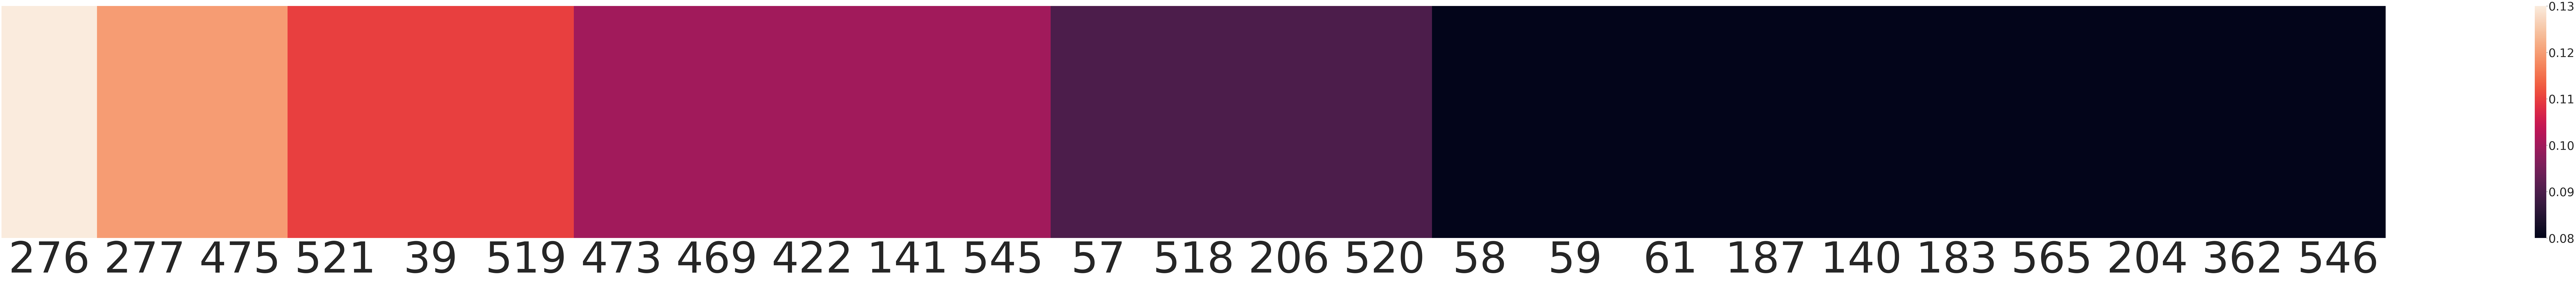

In [65]:
plt.clf()
fig, ax = plt.subplots(figsize=(250, 20))
sns.set(font_scale=5)


res = sns.heatmap(cell_sal3[:25].reshape((1, -1)))
# plt.xticks(np.arange(100), temp[:100])
res.set_xticklabels(temp[:25], fontsize = 200)
res.set_yticklabels([])

plt.show()

In [66]:
fig.savefig("827_Temozolomide_1298350.png")

## Aggregate across the drugs
1. accumulate the saliency scores of all cell lines' reaction with one drug
2. normalize the score
3. rank the genes and display top 50(?) genes

In [4]:
def make_drug_dict(dir):
    drug_dict = dict()
    sal_dict = dict()
    for filename in os.listdir(dir):
        drug_name = filename.split('_')[1]
        one = np.load(os.path.join(dir, filename))
        if drug_name not in drug_dict.keys() and drug_name not in sal_dict.keys():
            drug_dict[drug_name] = 1
            sal_dict[drug_name] = one
        else:
            drug_dict[drug_name] += 1
            sal_dict[drug_name] = np.add(sal_dict[drug_name], one)
    
    for k, v in sal_dict.items():
        sal_dict[k] = v/drug_dict[k]
    
    return drug_dict, sal_dict

In [5]:
cell_ss_dir = 'root_folder/root_069/Saliency/IG/CellLine/GATv2'
drug_dict, sal_dict =  make_drug_dict(cell_ss_dir)

In [6]:
print(drug_dict)

{'NVP-BHG712': 61, 'WIKI4': 79, 'Camptothecin': 59, 'I-BET-762': 76, 'Tipifarnib': 69, 'SN-38': 72, 'Axitinib': 61, 'Pazopanib': 60, 'NSC-87877': 68, 'GSK690693': 55, 'Bicalutamide': 124, 'PF-4708671': 69, 'PFI-1': 53, 'CCT-018159': 68, 'UNC1215': 65, 'Selisistat': 61, 'Etoposide': 65, 'PF-562271': 74, 'Bryostatin 1': 67, 'BIX02189': 59, 'TW 37': 63, 'Selumetinib': 106, 'JQ1': 125, 'Dactolisib': 50, 'AZD8055': 64, 'Cytarabine': 58, 'Pictilisib': 124, 'Entinostat': 26, 'Doramapimod': 54, 'PD173074': 44, 'SL0101': 64, 'QS11': 62, 'Sepantronium bromide': 52, 'Dacinostat': 59, 'AZD7762': 60, 'Mitomycin-C': 70, 'HG-5-113-01': 36, '681640': 51, 'AKT inhibitor VIII': 121, 'Amuvatinib': 63, 'SNX-2112': 58, 'ZSTK474': 53, 'WH-4-023': 20, 'Midostaurin': 67, 'Obatoclax Mesylate': 61, 'FMK': 59, 'LFM-A13': 68, 'MK-2206': 53, 'Ponatinib': 55, 'VX-11e': 68, 'Olaparib': 122, 'QL-XII-47': 54, 'Bosutinib': 62, 'Seliciclib': 33, 'NU7441': 68, 'Sorafenib': 20, 'Zibotentan': 58, 'Shikonin': 63, 'XMD8-85':

In [7]:
sal_dict['WIKI4']

array([[[0.00527713, 0.00717521, 0.00863612, 0.0180712 , 0.01233459,
         0.0204893 , 0.02609383, 0.02987288, 0.04207235, 0.02220691,
         0.03110817, 0.06823645, 0.02869127, 0.02792685, 0.04243999,
         0.03445248, 0.04039116, 0.12405051, 0.03231196, 0.04557862,
         0.02565635, 0.07957985, 0.03729092, 0.06491666, 0.03845416,
         0.07361392, 0.08378111, 0.09744314, 0.05630162, 0.09715862,
         0.03376982, 0.10473702, 0.08004474, 0.03771433, 0.05132241,
         0.08839657, 0.11485694, 0.05312586, 0.05264362, 0.10765452,
         0.0743641 , 0.07717273, 0.09000238, 0.03206106, 0.06983943,
         0.07675707, 0.18160268, 0.09545658, 0.04751535, 0.10623709,
         0.09461363, 0.12318087, 0.05766051, 0.12452749, 0.10099968,
         0.11653374, 0.09261669, 0.14249155, 0.11181052, 0.22924471,
         0.13819178, 0.06456612, 0.12543358, 0.1066255 , 0.07339032,
         0.09534687, 0.10021726, 0.14612465, 0.1411745 , 0.0566445 ,
         0.13276476, 0.12074071, 0

In [8]:
def normalize_ss(sal_dict):
    for k, v in sal_dict.items():
        max_ss = np.max(v)
        min_ss = np.min(v)
        sal_dict[k] = (v - min_ss) / (max_ss - min_ss)
    
    return sal_dict

In [9]:
norm_sal_dict = normalize_ss(sal_dict)
norm_sal_dict['WIKI4']

array([[[0.01049148, 0.01426506, 0.01716951, 0.03592742, 0.02452245,
         0.04073484, 0.05187724, 0.05939037, 0.08364418, 0.04414963,
         0.06184627, 0.13566114, 0.05704121, 0.05552147, 0.08437509,
         0.06849511, 0.0803018 , 0.24662526, 0.06423953, 0.09061502,
         0.05100749, 0.15821298, 0.07413822, 0.12906105, 0.07645086,
         0.14635209, 0.16656551, 0.19372705, 0.11193345, 0.1931614 ,
         0.06713789, 0.20822804, 0.15913724, 0.07498   , 0.10203427,
         0.17574155, 0.22834748, 0.10561971, 0.10466096, 0.21402833,
         0.14784354, 0.15342738, 0.17893406, 0.06374071, 0.13884803,
         0.15260101, 0.36104493, 0.18977756, 0.09446544, 0.21121035,
         0.1881017 , 0.24489632, 0.11463507, 0.24757356, 0.20079782,
         0.23168115, 0.18413158, 0.28328796, 0.22229089, 0.45576223,
         0.27473957, 0.12836414, 0.24937495, 0.21198254, 0.14590755,
         0.18955945, 0.19924228, 0.29051093, 0.28066953, 0.11261513,
         0.26395009, 0.24004504, 0

In [10]:
from utils_preproc import preproc_gene_expr, save_gene_expr_matrix_X

In [11]:
_, _, genes = save_gene_expr_matrix_X()
genes = genes.values
gene_list = [g.split(' (')[0] for g in genes]
gene_list

['KRT19',
 'SPARC',
 'C19orf33',
 'VIM',
 'UCHL1',
 'TGFBI',
 'KRT7',
 'FN1',
 'KRT8',
 'FXYD3',
 'S100P',
 'KRT18',
 'CD74',
 'SLPI',
 'EPCAM',
 'TACSTD2',
 'IFI27',
 'S100A6',
 'LCN2',
 'S100A14',
 'COL1A2',
 'SPINT2',
 'SERPINE1',
 'IGFBP3',
 'KRT17',
 'MT1E',
 'CLDN4',
 'CAV1',
 'IGFBP7',
 'CD24',
 'HLA-DRA',
 'TM4SF1',
 'MAL2',
 'SPP1',
 'NNMT',
 'SFN',
 'MGST1',
 'EFEMP1',
 'SRGN',
 'S100A16',
 'ELF3',
 'COL1A1',
 'THBS1',
 'THY1',
 'CLDN7',
 'RAB25',
 'ANXA1',
 'DKK1',
 'MMP2',
 'IFITM1',
 'TFPI2',
 'CCN1',
 'GPX2',
 'S100A2',
 'COL6A2',
 'FSTL1',
 'LCP1',
 'S100A4',
 'TINAGL1',
 'LGALS1',
 'ARHGDIB',
 'ALDH1A1',
 'BST2',
 'ALDH1A3',
 'AKR1C2',
 'CDH1',
 'MYL9',
 'ANXA3',
 'DMKN',
 'COL6A3',
 'PLAU',
 'CRIP1',
 'COL3A1',
 'ST14',
 'TGM2',
 'EEF1A2',
 'CCDC80',
 'TIMP3',
 'CDKN2A',
 'CCN2',
 'DKK3',
 'LAMC2',
 'IGFBP2',
 'F3',
 'AREG',
 'IGFBP5',
 'TPM2',
 'IL32',
 'CD44',
 'RBP1',
 'IFITM2',
 'CYBA',
 'AKR1C3',
 'GJA1',
 'EMP1',
 'BASP1',
 'AXL',
 'MMP14',
 'COL4A2',
 'IFITM3',


In [12]:
gene_list = np.array(gene_list)
gene_list

array(['KRT19', 'SPARC', 'C19orf33', 'VIM', 'UCHL1', 'TGFBI', 'KRT7',
       'FN1', 'KRT8', 'FXYD3', 'S100P', 'KRT18', 'CD74', 'SLPI', 'EPCAM',
       'TACSTD2', 'IFI27', 'S100A6', 'LCN2', 'S100A14', 'COL1A2',
       'SPINT2', 'SERPINE1', 'IGFBP3', 'KRT17', 'MT1E', 'CLDN4', 'CAV1',
       'IGFBP7', 'CD24', 'HLA-DRA', 'TM4SF1', 'MAL2', 'SPP1', 'NNMT',
       'SFN', 'MGST1', 'EFEMP1', 'SRGN', 'S100A16', 'ELF3', 'COL1A1',
       'THBS1', 'THY1', 'CLDN7', 'RAB25', 'ANXA1', 'DKK1', 'MMP2',
       'IFITM1', 'TFPI2', 'CCN1', 'GPX2', 'S100A2', 'COL6A2', 'FSTL1',
       'LCP1', 'S100A4', 'TINAGL1', 'LGALS1', 'ARHGDIB', 'ALDH1A1',
       'BST2', 'ALDH1A3', 'AKR1C2', 'CDH1', 'MYL9', 'ANXA3', 'DMKN',
       'COL6A3', 'PLAU', 'CRIP1', 'COL3A1', 'ST14', 'TGM2', 'EEF1A2',
       'CCDC80', 'TIMP3', 'CDKN2A', 'CCN2', 'DKK3', 'LAMC2', 'IGFBP2',
       'F3', 'AREG', 'IGFBP5', 'TPM2', 'IL32', 'CD44', 'RBP1', 'IFITM2',
       'CYBA', 'AKR1C3', 'GJA1', 'EMP1', 'BASP1', 'AXL', 'MMP14',
       'COL4A2', 'IFIT

In [13]:
def rank_ss(sal_dict):
    rank_dict = dict()
    for k, v in sal_dict.items():
        temp = np.argsort(-1*(v.reshape(-1)))
        rank_dict[k] = temp
        
    return rank_dict

In [14]:
rank_dict = rank_ss(sal_dict)
rank_dict['WIKI4']

array([547, 515, 408, 914, 210, 128, 573, 158, 772, 277, 334, 777, 804,
       309, 564, 228, 208, 176, 666,  59, 358, 485, 559, 508, 215, 459,
       429, 618, 220, 606, 417, 218, 251, 790,  91, 107, 432, 788, 717,
       365, 188, 595,  88,  99, 203, 308, 291, 781, 793, 310, 229, 827,
       283, 757, 842, 172, 211, 197, 123, 250, 177, 673, 554, 326, 169,
       393, 664, 234,  46,  86, 405, 164, 650, 353, 129, 625, 509, 241,
       802,  97, 306,  90, 373, 859, 287, 889, 892, 711, 368, 282, 660,
       574, 301, 184, 340, 274, 168, 609, 483, 125, 909, 252, 201, 447,
        78, 116, 558, 592, 860,  74, 142, 412, 702, 458, 601, 495, 479,
       106,  75, 318, 801, 466, 332, 415, 314, 686, 525, 484, 212, 632,
       391, 478, 117, 339, 161, 723, 853, 344, 645, 151,  94, 491, 279,
        67, 444, 724, 296, 451, 579, 770, 760, 110,  57, 131, 520, 814,
       427, 496, 762, 101, 635,  68, 390, 613, 361, 236, 769, 942, 114,
       518, 622,  83, 118, 295,  60, 255, 407, 822, 667, 397, 58

##### test one drug first

In [14]:
k = 'Olaparib'
rnk = rank_dict[k]
ss = sal_dict[k].reshape(-1)
ranked_ss = ss[rnk]
ranked_ss

array([1.        , 0.64300834, 0.55348143, 0.41824241, 0.40138752,
       0.39910747, 0.38530342, 0.38200738, 0.33323156, 0.32425881,
       0.32414823, 0.32370683, 0.30682956, 0.30421723, 0.30274935,
       0.30102608, 0.29798576, 0.29687628, 0.29535332, 0.29529292,
       0.29450137, 0.29370162, 0.29315863, 0.28828311, 0.28495223,
       0.28477319, 0.28332473, 0.2798341 , 0.27864702, 0.2764409 ,
       0.27537266, 0.27424282, 0.2738848 , 0.27163633, 0.26941666,
       0.26820983, 0.2617993 , 0.26150769, 0.25994332, 0.25942828,
       0.25829122, 0.2567456 , 0.25506666, 0.25486598, 0.25436226,
       0.253764  , 0.25250394, 0.25168776, 0.25116255, 0.25045544,
       0.25032642, 0.24835747, 0.24739996, 0.24663292, 0.24579423,
       0.24570127, 0.24481229, 0.24267984, 0.24115195, 0.2406597 ,
       0.24053769, 0.24039539, 0.23876607, 0.23661449, 0.23640225,
       0.23558391, 0.2353393 , 0.23466598, 0.23285281, 0.23214758,
       0.23213773, 0.22790457, 0.22661943, 0.22578519, 0.22548

In [54]:
ranked_gene_list = gene_list[rnk]
ranked_gene_list

array(['TMSB4X', 'ANXA2', 'LDHB', 'GSTP1', 'MT2A', 'S100A10', 'APP',
       'RAB13', 'LGALS1', 'HLA-C', 'IFITM3', 'AKR1B1', 'COTL1', 'PHGDH',
       'ASPH', 'S100A11', 'LY6E', 'ITGB5', 'ID3', 'S100A13', 'IFI30',
       'NIBAN2', 'SERPINH1', 'CBR1', 'NQO1', 'GLUL', 'CD9', 'MFGE8',
       'IFI6', 'ISG15', 'TPM2', 'MDK', 'ID2', 'BEX3', 'PFN2', 'TIMP2',
       'STXBP2', 'CYBA', 'LAPTM4B', 'LAMA5', 'ID1', 'PYGL', 'CLU',
       'PDLIM1', 'DDR1', 'TUBB6', 'LMNA', 'CD44', 'FXYD5', 'CALD1',
       'FSCN1', 'MSN', 'CKB', 'ASS1', 'FABP5', 'TIMP1', 'ITGA3', 'SDC1',
       'TCEAL9', 'FAT1', 'TUBB3', 'AHNAK', 'TPM1', 'HTATIP2', 'TXNIP',
       'OCIAD2', 'CD99', 'SDC4', 'FADS2', 'HSPA1A', 'TUBA4A', 'LGALS3',
       'CST3', 'F11R', 'CDKN1A', 'LGALS3BP', 'PTPRF', 'MXRA7', 'DCBLD2',
       'PTK7', 'RAB34', 'VAMP8', 'SCRN1', 'FKBP9', 'IFITM2', 'JUP',
       'PALLD', 'EPHA2', 'HLA-B', 'CNN3', 'CASP4', 'GSN', 'PSMB9',
       'ANXA1', 'TMEM54', 'PLAUR', 'ATP1B1', 'TNFRSF12A', 'LAMB2',
       'PEG10', 'EMP3'

In [15]:
top_n = 30
index = ranked_gene_list[:top_n]
values = ranked_ss[:top_n]

NameError: name 'ranked_gene_list' is not defined

In [ ]:
index.values

<Figure size 432x288 with 0 Axes>

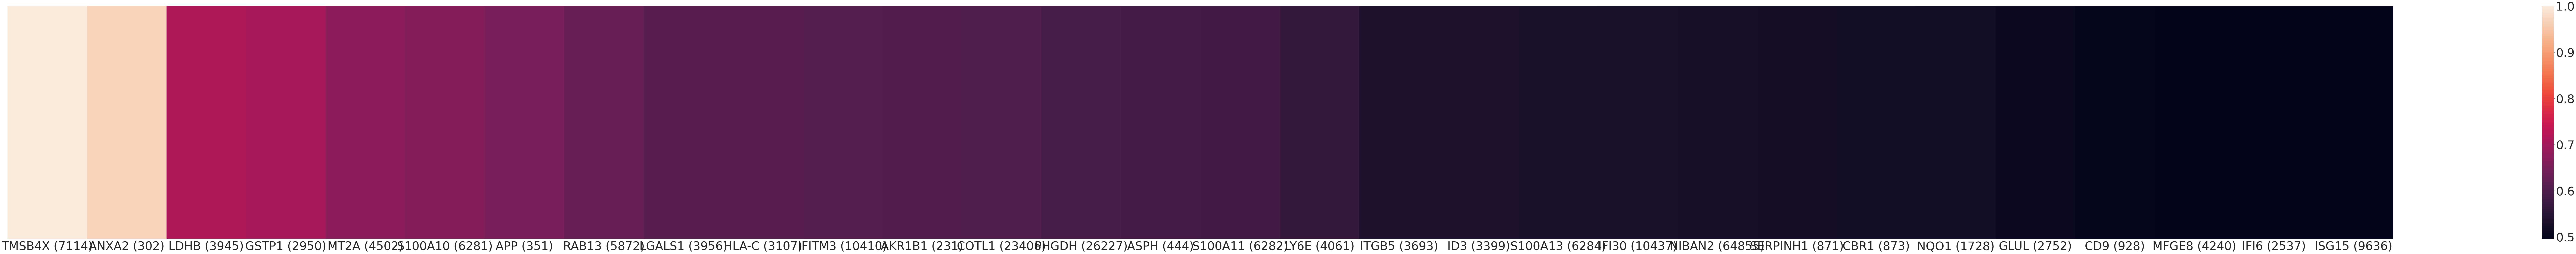

In [40]:
plt.clf()
fig, ax = plt.subplots(figsize=(250, 20))
sns.set(font_scale=5)


res = sns.heatmap(values.reshape(1, -1))
# plt.xticks(np.arange(100), temp[:100])
res.set_xticklabels(index)
res.set_yticklabels([])

# plt.show()
fig.savefig('Olaparib_gene_saliency.png')

##### Compile into funcitons

In [60]:
def draw_one_drug(save_path, drug_name, ranked_ss, ranked_genes, top_n=25):
    values = ranked_ss[:top_n]
    index = ranked_genes[:top_n]
    
    plt.clf()
    fig, ax = plt.subplots(figsize=(250, 20))
    sns.set(font_scale=5)


    res = sns.heatmap(values.reshape(1, -1))
    # plt.xticks(np.arange(100), temp[:100])
    res.set_xticklabels(index)
    res.set_yticklabels([])

    # plt.show()
    fig.savefig(save_path + drug_name + '.png')

In [61]:
def draw_gene_saliency(rank_dict, sal_dict, gene_list, save_path):
    i = 0
    for drug in sal_dict.keys():
        i += 1
        print('working on ', drug)
        print('progress: ', i, '/', len(sal_dict))
        rnk = rank_dict[drug]
        sal_score = sal_dict[drug].reshape(-1)
        ranked_ss = sal_score[rnk]
        ranked_genes = gene_list[rnk]

        draw_one_drug(save_path, drug, ranked_ss, ranked_genes)

In [62]:
len(sal_dict)

223

working on  KIN001-266
progress:  1 / 223
working on  SL0101
progress:  2 / 223
working on  Tivozanib
progress:  3 / 223
working on  Obatoclax Mesylate
progress:  4 / 223
working on  PAC-1
progress:  5 / 223
working on  (5Z)-7-Oxozeaenol
progress:  6 / 223
working on  Palbociclib
progress:  7 / 223
working on  Linifanib
progress:  8 / 223
working on  Pelitinib
progress:  9 / 223
working on  BMS-754807
progress:  10 / 223
working on  Luminespib
progress:  11 / 223
working on  BIX02189
progress:  12 / 223
working on  ZM447439
progress:  13 / 223
working on  Motesanib
progress:  14 / 223
working on  Selisistat
progress:  15 / 223
working on  Pictilisib
progress:  16 / 223
working on  YK-4-279
progress:  17 / 223
working on  JNK-9L
progress:  18 / 223
working on  Olaparib
progress:  19 / 223
working on  Serdemetan
progress:  20 / 223


/tmp/ipykernel_24142/2070332842.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(250, 20))


working on  Cabozantinib
progress:  21 / 223
working on  TW 37
progress:  22 / 223
working on  PF-4708671
progress:  23 / 223
working on  AICA Ribonucleotide
progress:  24 / 223
working on  TAK-715
progress:  25 / 223
working on  PD173074
progress:  26 / 223
working on  Bexarotene
progress:  27 / 223
working on  Tretinoin
progress:  28 / 223
working on  SB216763
progress:  29 / 223
working on  Fedratinib
progress:  30 / 223
working on  Phenformin
progress:  31 / 223
working on  HG-5-88-01
progress:  32 / 223
working on  BX-912
progress:  33 / 223
working on  FH535
progress:  34 / 223
working on  EHT-1864
progress:  35 / 223
working on  Quizartinib
progress:  36 / 223
working on  Midostaurin
progress:  37 / 223
working on  Sepantronium bromide
progress:  38 / 223
working on  PLX-4720
progress:  39 / 223
working on  JNK Inhibitor VIII
progress:  40 / 223
working on  Bicalutamide
progress:  41 / 223
working on  CP724714
progress:  42 / 223
working on  NVP-BHG712
progress:  43 / 223
workin

<Figure size 432x288 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

<Figure size 18000x1440 with 0 Axes>

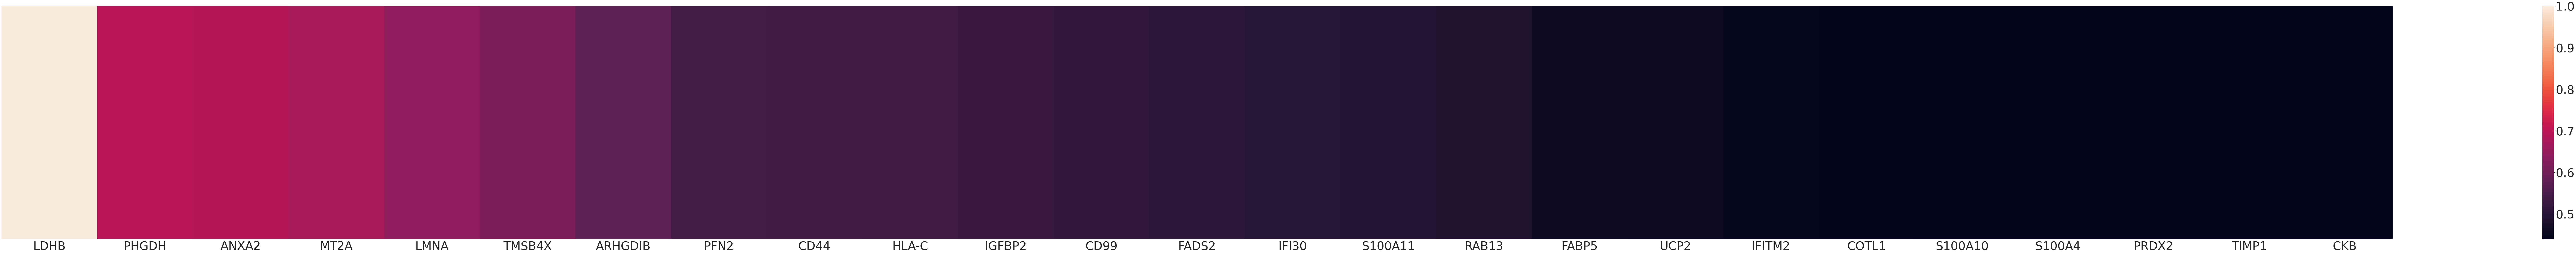

In [63]:
save_path = 'root_folder/root_020/SaliencyMap/IG/CellLine/GAT_Edge/'
os.makedirs(save_path, exist_ok=True)
draw_gene_saliency(rank_dict, sal_dict, gene_list, save_path)

#### Draw top n genes' saliency scores for selected drugs

In [15]:
c_filelist = os.listdir(cell_ss_dir)
len(c_filelist)

13321

In [16]:
agg_score = np.zeros(1000)
for file in c_filelist:
    one = np.load(os.path.join(cell_ss_dir, file)).reshape(-1)
    agg_score += one
agg_score /= len(c_filelist)

In [17]:
rnk = np.argsort(-1*agg_score)
ranked_genes = gene_list[rnk]

#### Fit powerlaw to select top salient genes

In [33]:
import powerlaw as pl

In [34]:
max_ss = agg_score.max()
min_ss = agg_score.min()

In [36]:
params_power_law, loglikelihood_power_law = pl.distribution_fit(agg_score, distribution='power_law', xmin=min_ss, xmax=max_ss, discrete=False, comparison_alpha=False, search_method='Likelihood', estimate_discrete=False)
loglikelihood_power_law

/home/conghao001/miniconda3/envs/gnndrug/lib/python3.8/site-packages/powerlaw.py:2338: RuntimeWarning: divide by zero encountered in divide
  initial_parameters = [1 + n / sum(log(data / (xmin)))]
/home/conghao001/miniconda3/envs/gnndrug/lib/python3.8/site-packages/powerlaw.py:2338: RuntimeWarning: invalid value encountered in divide
  initial_parameters = [1 + n / sum(log(data / (xmin)))]


nan

In [37]:
params_lognormal, loglikelihood_lognormal = pl.distribution_fit(agg_score, distribution='lognormal', xmin=min_ss, xmax=max_ss, discrete=False, comparison_alpha=False, search_method='Likelihood', estimate_discrete=False)
loglikelihood_lognormal

/home/conghao001/miniconda3/envs/gnndrug/lib/python3.8/site-packages/powerlaw.py:2350: RuntimeWarning: divide by zero encountered in log
  logdata = log(data)
/home/conghao001/miniconda3/envs/gnndrug/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/conghao001/miniconda3/envs/gnndrug/lib/python3.8/site-packages/powerlaw.py:2790: RuntimeWarning: divide by zero encountered in log
  if sigma <= 0 or mu < log(xmin):
/home/conghao001/miniconda3/envs/gnndrug/lib/python3.8/site-packages/powerlaw.py:2805: RuntimeWarning: divide by zero encountered in divide
  likelihoods = (1.0 / data) * exp(-((log(data) - mu) ** 2) / (2 * sigma ** 2)) *\
/home/conghao001/miniconda3/envs/gnndrug/lib/python3.8/site-packages/powerlaw.py:2805: RuntimeWarning: divide by zero encountered in log
  likelihoods = (1.0 / data) * exp(-((log(data) - mu) ** 2) / (2 * sigma ** 2)) *\
/home/conghao001/miniconda3/envs/gnndrug/li

nan

In [38]:
params_expo, loglikelihood_expo = pl.distribution_fit(agg_score, distribution='exponential', xmin=min_ss, xmax=max_ss, discrete=False, comparison_alpha=False, search_method='Likelihood', estimate_discrete=False)
loglikelihood_expo

1396.6223308096326

In [39]:
params_stretched, loglikelihood_stretched = pl.distribution_fit(agg_score, distribution='stretched_exponential', xmin=min_ss, xmax=max_ss, discrete=False, comparison_alpha=False, search_method='Likelihood', estimate_discrete=False)
loglikelihood_stretched

/home/conghao001/miniconda3/envs/gnndrug/lib/python3.8/site-packages/powerlaw.py:2706: RuntimeWarning: invalid value encountered in power
  exp((Lambda * (xmin - data))**beta)
/home/conghao001/miniconda3/envs/gnndrug/lib/python3.8/site-packages/powerlaw.py:2705: RuntimeWarning: divide by zero encountered in power
  likelihoods = (data * Lambda)**(beta-1) * beta * Lambda *\


1396.6223308096337

In [45]:
theoretical_distribution = pl.Exponential(xmin=min_ss, parameters=params_expo, xmax=max_ss, discrete=False)
prob_dist = theoretical_distribution.cdf(agg_score)
alpha = 0.9
selected_features = prob_dist > (1-alpha)
selected_features.sum()

971

In [44]:
selected_genes = ranked_genes[selected_features]
selected_genes

array(['PDLIM1', 'PERP', 'PLAUR', 'MYOF', 'GDF15', 'FRMD6', 'PLIN2',
       'ARHGDIB', 'HDGFL3', 'PHLDA3', 'PLAU', 'ARL4C', 'ROBO1', 'DUSP4',
       'HTRA1', 'SCNN1A', 'HLA-DRB1', 'CDH3', 'COL9A3', 'TCF4', 'NOTCH3',
       'HID1', 'GNG2', 'WNT5A', 'OASL', 'MMP2', 'MX2', 'NNMT'],
      dtype='<U10')

In [18]:
top_n = 100
selected_genes = ranked_genes[:top_n]
selected_genes

array(['TMSB4X', 'LDHB', 'ANXA2', 'GSTP1', 'MT2A', 'APP', 'S100A11',
       'LMNA', 'S100A10', 'NQO1', 'LGALS1', 'AKR1B1', 'GLUL', 'ASPH',
       'HLA-C', 'S100A13', 'LY6E', 'IFITM3', 'COTL1', 'ID3', 'HLA-B',
       'TPM1', 'FABP5', 'PHGDH', 'SERPINH1', 'MDK', 'AHNAK', 'LGALS3BP',
       'CD99', 'LAPTM4B', 'ISG15', 'BEX3', 'ID1', 'CST3', 'C12orf75',
       'CD9', 'PFN2', 'IFI30', 'CYBA', 'CDKN1A', 'CBR1', 'FSCN1', 'FXYD5',
       'TIMP1', 'H1-0', 'TUBB6', 'SDC4', 'CKB', 'MSN', 'CLU', 'EMP3',
       'NDRG1', 'ID2', 'SERPINB6', 'TNFRSF12A', 'TUBB3', 'RAB13', 'TXNIP',
       'OCIAD2', 'PDLIM1', 'TUBA1A', 'FOS', 'IFI6', 'HSPA1A', 'PTPRF',
       'ENAH', 'ALDH7A1', 'LGALS3', 'PYGL', 'CD44', 'CCND1', 'LAMB2',
       'IER3', 'TUBA4A', 'TCEAL9', 'CTSZ', 'ITGA3', 'SDC1', 'PRDX2',
       'LAMB1', 'FKBP9', 'CTSL', 'FADS2', 'TRIP6', 'DDR1', 'IFITM2',
       'PSMB8', 'SCRN1', 'H2AJ', 'CNN3', 'ANXA1', 'GSN', 'TPM2', 'PEG10',
       'ASS1', 'GPC1', 'ATP1B1', 'MXRA7', 'TES', 'PERP'], dtype='<U10')

In [19]:
ranked_score = agg_score[rnk]
ranked_score[:top_n]

array([0.43803589, 0.38952442, 0.35315799, 0.28880554, 0.27908506,
       0.27349233, 0.27342728, 0.27057337, 0.25605922, 0.25141977,
       0.23560974, 0.23010199, 0.22403397, 0.22347434, 0.22295063,
       0.21813555, 0.21732041, 0.21577832, 0.2142492 , 0.21407462,
       0.21378084, 0.21329017, 0.21304106, 0.20956245, 0.20758245,
       0.20644708, 0.20485412, 0.20338586, 0.20279887, 0.2004853 ,
       0.19988823, 0.19785604, 0.19667081, 0.1959767 , 0.19585868,
       0.19564059, 0.19542747, 0.19353902, 0.19102874, 0.18964687,
       0.18924048, 0.18897353, 0.18659729, 0.18518208, 0.18507274,
       0.18491598, 0.18315791, 0.1827241 , 0.18234276, 0.18223843,
       0.18219855, 0.18185258, 0.18153326, 0.18067159, 0.18066058,
       0.18055927, 0.18021252, 0.17982069, 0.17964025, 0.17900433,
       0.1789628 , 0.17690529, 0.17643455, 0.17570735, 0.17505317,
       0.17487681, 0.17487554, 0.17422588, 0.17194079, 0.17192963,
       0.17108619, 0.17033993, 0.17021747, 0.16966106, 0.16929

In [25]:
# selected_drug_path = 'root_folder/root_069/SaliencyMap/GNNExplainer/Bonds/GATv2/selected_drugs'
# selected_drug_path = drug_path
# d_list = [f.split('.')[0] for f in os.listdir(selected_drug_path)]
d_list = list(drug_dict.keys())
d_list

['NVP-BHG712',
 'WIKI4',
 'Camptothecin',
 'I-BET-762',
 'Tipifarnib',
 'SN-38',
 'Axitinib',
 'Pazopanib',
 'NSC-87877',
 'GSK690693',
 'Bicalutamide',
 'PF-4708671',
 'PFI-1',
 'CCT-018159',
 'UNC1215',
 'Selisistat',
 'Etoposide',
 'PF-562271',
 'Bryostatin 1',
 'BIX02189',
 'TW 37',
 'Selumetinib',
 'JQ1',
 'Dactolisib',
 'AZD8055',
 'Cytarabine',
 'Pictilisib',
 'Entinostat',
 'Doramapimod',
 'PD173074',
 'SL0101',
 'QS11',
 'Sepantronium bromide',
 'Dacinostat',
 'AZD7762',
 'Mitomycin-C',
 'HG-5-113-01',
 '681640',
 'AKT inhibitor VIII',
 'Amuvatinib',
 'SNX-2112',
 'ZSTK474',
 'WH-4-023',
 'Midostaurin',
 'Obatoclax Mesylate',
 'FMK',
 'LFM-A13',
 'MK-2206',
 'Ponatinib',
 'VX-11e',
 'Olaparib',
 'QL-XII-47',
 'Bosutinib',
 'Seliciclib',
 'NU7441',
 'Sorafenib',
 'Zibotentan',
 'Shikonin',
 'XMD8-85',
 'Fedratinib',
 'GSK650394',
 'SGC0946',
 'CP466722',
 'Masitinib',
 '5-Fluorouracil',
 'NSC-207895',
 'FR-180204',
 'GW441756',
 'WZ3105',
 'KIN001-260',
 'Y-39983',
 'CP724714',

In [26]:
norm_sal_dict = normalize_ss(sal_dict)

In [27]:
# selected_sal_dict = {k:v for k, v in norm_sal_dict.items() if k in d_list}
# selected_drug_dict = {k:v for k, v in drug_dict.items() if k in d_list}

selected_sal_dict = norm_sal_dict
selected_drug_dict = drug_dict

In [28]:
selected_sal_dict['XAV939']

array([[[0.01471293, 0.02652476, 0.0177546 , 0.04617101, 0.03256405,
         0.04404029, 0.05186245, 0.09729884, 0.11150634, 0.04893982,
         0.0466699 , 0.12210744, 0.04987215, 0.07546755, 0.08504591,
         0.04469261, 0.10328717, 0.208839  , 0.06570181, 0.06210755,
         0.05499551, 0.13931169, 0.09336708, 0.12354351, 0.08712539,
         0.11855184, 0.12798944, 0.18845512, 0.16715282, 0.22927082,
         0.06963699, 0.19423643, 0.16504261, 0.12893247, 0.15997586,
         0.13779904, 0.26641635, 0.13049181, 0.14126481, 0.23331474,
         0.16812734, 0.16176815, 0.20298233, 0.09124481, 0.20197363,
         0.12647007, 0.43728733, 0.12367099, 0.13438554, 0.33795298,
         0.17519123, 0.21039895, 0.15079893, 0.1969622 , 0.22909115,
         0.18250148, 0.16445351, 0.42972589, 0.15957522, 0.66405673,
         0.25264801, 0.15377038, 0.30817637, 0.25631105, 0.16863973,
         0.2081629 , 0.18485001, 0.20343115, 0.25348655, 0.14568307,
         0.33271124, 0.23020663, 0

In [29]:
for k, v in selected_sal_dict.items():
    selected_sal_dict[k] = v.reshape(-1)[rnk][:top_n]

In [30]:
selected_sal_dict['XAV939']

array([0.7696153 , 1.        , 0.72240322, 0.79977616, 0.6982634 ,
       0.66857897, 0.77064863, 0.74932315, 0.64687417, 0.72615937,
       0.66405673, 0.54202582, 0.42970629, 0.55784458, 0.63847932,
       0.5000546 , 0.62898602, 0.50047534, 0.54589509, 0.47673615,
       0.44700402, 0.48834751, 0.4023201 , 0.57821632, 0.41608428,
       0.653587  , 0.47641661, 0.53126545, 0.44988171, 0.45780263,
       0.38204961, 0.53884791, 0.44350056, 0.46286992, 0.5221956 ,
       0.51398399, 0.63674216, 0.37318998, 0.55655915, 0.40538899,
       0.52282055, 0.41059198, 0.50670565, 0.42385755, 0.4574798 ,
       0.37481361, 0.39571462, 0.57022317, 0.41966342, 0.41239018,
       0.40725291, 0.31538357, 0.34573561, 0.4895888 , 0.4347774 ,
       0.436108  , 0.48481595, 0.37566102, 0.45026662, 0.35981564,
       0.43752792, 0.38219048, 0.46041217, 0.4489359 , 0.37845043,
       0.53086804, 0.47100188, 0.48357188, 0.36367207, 0.40076456,
       0.45152883, 0.54193454, 0.35756152, 0.34339523, 0.45440

In [31]:
df = pd.DataFrame.from_dict(selected_sal_dict, orient='index', columns=selected_genes)
df

TMSB4X      LDHB     ANXA2     GSTP1      MT2A       APP  \
NVP-BHG712    1.000000  0.881747  0.673298  0.617116  0.583546  0.525588   
WIKI4         1.000000  0.878309  0.646502  0.472212  0.532665  0.543278   
Camptothecin  1.000000  0.798205  0.733949  0.571976  0.393014  0.404829   
I-BET-762     1.000000  0.654653  0.719652  0.661147  0.553143  0.765690   
Tipifarnib    0.816225  1.000000  0.922014  0.505012  0.586216  0.532028   
...                ...       ...       ...       ...       ...       ...   
Erlotinib     1.000000  0.990942  0.675452  0.697882  0.759405  0.843584   
Belinostat    1.000000  0.780389  0.809452  0.578243  0.750653  0.825102   
GNF-2         1.000000  0.959807  0.573321  0.560751  0.556466  0.620126   
Salubrinal    1.000000  0.728067  0.558196  0.532694  0.606556  0.417362   
CGP-082996    0.679083  1.000000  0.504011  0.442943  0.361108  0.477812   

               S100A11      LMNA   S100A10      NQO1  ...     ANXA1       GSN  \
NVP-BHG712    0.491206  0.725662  0.477636  0.717693  ...  0.299167  0.338700   
WIKI4         0.583334  0.472941  0.564561  0.513481  ...  0.361045  0.305422   
Camptothecin  0.400384  0.340589  0.403840  0.462947  ...  0.289969  0.292726   
I-BET-762     0.808088  0.542719  0.498881  0.556019  ...  0.281247  0.438254   
Tipifarnib    0.704750  0.602397  0.635844  0.456522  ...  0.317874  0.419678   
...                ...       ...       ...       ...  ...       ...       ...   
Erlotinib     0.775657  0.819806  0.503162  0.430583  ...  0.256881  0.381971   
Belinostat    0.501459  0.452344  0.583211  0.536593  ...  0.309236  0.339293   
GNF-2         0.404388  0.664178  0.403791  0.454223  ...  0.330399  0.289401   
Salubrinal    0.267198  0.457942  0.424064  0.326780  ...  0.278086  0.331798   
CGP-082996    0.305243  0.466883  0.333166  0.299181  ...  0.196326  0.216278   

                  TPM2     PEG10      ASS1      GPC1    ATP1B1     MXRA7  \
NVP-BHG712    0.375277  0.320263  0.383829  0.350842  0.398887  0.294281   
WIKI4         0.360825  0.369384  0.299377  0.334167  0.276357  0.334512   
Camptothecin  0.274789  0.222264  0.248737  0.225155  0.261810  0.349916   
I-BET-762     0.364631  0.366077  0.330128  0.432236  0.299000  0.381241   
Tipifarnib    0.372327  0.474898  0.393039  0.315271  0.442227  0.405925   
...                ...       ...       ...       ...       ...       ...   
Erlotinib     0.361299  0.341829  0.309638  0.216087  0.420872  0.460212   
Belinostat    0.359286  0.408461  0.364375  0.356693  0.306088  0.312682   
GNF-2         0.343043  0.300029  0.379440  0.274497  0.196663  0.261115   
Salubrinal    0.455688  0.374749  0.126592  0.201879  0.309725  0.377812   
CGP-082996    0.216885  0.155516  0.263163  0.301936  0.312749  0.218910   

                   TES      PERP  
NVP-BHG712    0.336834  0.383088  
WIKI4         0.264615  0.308288  
Camptothecin  0.201206  0.186477  
I-BET-762     0.327202  0.368077  
Tipifarnib    0.281805  0.342489  
...                ...       ...  
Erlotinib     0.198420  0.309137  
Belinostat    0.318143  0.463199  
GNF-2         0.248609  0.302330  
Salubrinal    0.254115  0.169549  
CGP-082996    0.239098  0.149038  

[223 rows x 100 columns]

In [32]:
plt.clf()
plt.cla()
plt.close()

fig, ax = plt.subplots(figsize=(60, 300))
# plt.legend(fontsize=10)
sns.set(font_scale=4)


res = sns.heatmap(df, cmap="YlGnBu", cbar_kws={"location": "top",
                                              "orientation": "horizontal", 
                                              "pad": 0.005})
# plt.xticks(np.arange(100), temp[:100])
res.set_xticklabels(df.columns, fontdict={'fontsize':50}, rotation=90)
res.set_yticklabels(df.index, fontdict={'fontsize':50})

plt.show()

In [63]:
fig.savefig("allDrugs_topGenes.png")

## Drawing saliency map for all drugs and cell lines

In [34]:
import os
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import AllChem


In [3]:
d_path = 'root_folder/root_006/Saliency/Drug/GATv2/'
c_path = 'root_folder/root_006/Saliency/CellLine/GATv2/'

In [8]:
for filename in os.listdir(d_path):
    combi = filename.split('.')[0]
    print(combi)
    drug = combi.split('_')[1]
    cell_line = combi.split('_')[2]
    print(drug, cell_line)
    

0_Axitinib_907313
Axitinib 907313
1000_JQ1_724879
JQ1 724879
1001_Gemcitabine_907311
Gemcitabine 907311
1002_SB216763_1290806
SB216763 1290806
1003_Docetaxel_907073
Docetaxel 907073
1004_AZD6482_1298347
AZD6482 1298347
1005_Trametinib_909251
Trametinib 909251
1006_GSK269962A_910916
GSK269962A 910916
1007_Sorafenib_907269
Sorafenib 907269
1008_YK-4-279_910691
YK-4-279 910691
1009_Nutlin-3a (-)_906853
Nutlin-3a (-) 906853
100_Olaparib_907313
Olaparib 907313
1010_Pictilisib_909702
Pictilisib 909702
1011_Daporinad_906846
Daporinad 906846
1012_Olaparib_910915
Olaparib 910915
1013_OSI-027_1240208
OSI-027 1240208
1014_Linsitinib_1298537
Linsitinib 1298537
1015_VX-11e_684072
VX-11e 684072
1016_Entinostat_753552
Entinostat 753552
1017_SB216763_687568
SB216763 687568
1018_JQ1_949156
JQ1 949156
1019_OSI-027_910688
OSI-027 910688
101_Docetaxel_1240215
Docetaxel 1240215
1020_Cytarabine_909773
Cytarabine 909773
1021_GSK269962A_906826
GSK269962A 906826
1022_NU7441_1290730
NU7441 1290730
1023_Vinblast

In [4]:
from torch_geometric.loader import DataLoader
import torch
import numpy as np
import pandas as pd

/data/conghao001/anaconda3/envs/gnndrug/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
from utils_data import TestbedDataset

In [10]:
branch_folder = "root_folder/root_010"
dataset = 'GDSC'
test_data = TestbedDataset(root=branch_folder, dataset=dataset+'_test_mix')

Pre-processed data found: root_folder/root_010/processed/GDSC_test_mix.pt, loading ...


In [11]:
test_batch = 1
test_loader = DataLoader(test_data, batch_size=test_batch, shuffle=False)

In [12]:
next(iter(test_loader))

DataBatch(x=[38, 270], edge_index=[2, 84], y=[1], edge_features=[84, 4], smiles=[1], drug_name=[1], cell_line_name=[1], target=[1, 735], c_size=[1], batch=[38], ptr=[2])

In [26]:
# import glob
d_save_path = 'root_folder/root_006/SaliencyMap/Drug/GATv2/'
c_save_path = 'root_folder/root_006/SaliencyMap/CellLine/GATv2/'

os.makedirs(d_save_path, exist_ok=True)
os.makedirs(c_save_path, exist_ok=True)

In [28]:
for idx, data in enumerate(test_loader):
    print(idx)
    drug = data.drug_name[0]
    cell_line = data.cell_line_name[0]
    postflix = drug + '_' + cell_line +'.npy'
    filename = d_path + str(idx) + '_' + drug + '_' + cell_line + '.npy'
    
    saliency_score = np.load(filename)
    ss = np.sum(saliency_score, axis=1)
    norm = np.linalg.norm(ss)
    ss = ss / norm
    ss = np.round(ss, 2)
    
    smiles = data.smiles[0]
    mol = Chem.MolFromSmiles(smiles)
    for i, atom in enumerate(mol.GetAtoms()):
        # For each atom, set the property "molAtomMapNumber" to a custom number, let's say, the index of the atom in the molecule
        atom.SetProp("atomNote", str(ss[i]))
    Chem.Draw.MolToImageFile(mol, d_save_path + drug + '_' + cell_line + '.png', size = (1000, 1000))
#     f = [filename for filename in os.listdir(d_path) if filename.match('*_' + drug + '_' + cell_line +'.npy')]
#     filename =  glob.glob(d_path + '*' + postflix)
#     print(filename)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27